<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Capstone Project 7:** Impute Missing Values


#### Student Author: Abigail Hedden

## Objectives


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


## Set-up


In [23]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt

### Load in the dataset

In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Finding and Removing Duplicates

In [6]:
# find duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 20


In [9]:
# remove duplicate rows
df.drop_duplicates(inplace=True)

# verify no duplicates
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# examine new number of rows/columns
df.shape

Number of duplicate rows: 0


(65437, 114)

### Finding Missing Values

In [10]:
# calculate missing values for all columns
missing_values = df.isnull().sum()
print(missing_values)

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [12]:
# count the number of missing rows in `RemoteWork` column
missing_remote_work = df['RemoteWork'].isnull().sum()
print(f"Missing rows in 'RemoteWork': {missing_remote_work}")

Missing rows in 'RemoteWork': 10631


### Imputing Missing Values
#### Find the value counts for the column RemoteWork.


In [13]:
remote_work_counts = df['RemoteWork'].value_counts(dropna=False)
print(remote_work_counts)

Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
NaN                                     10631
Name: RemoteWork, dtype: int64


##### Identify the most frequent (majority) value in the RemoteWork column.



In [16]:
mode_remote = df['RemoteWork'].mode()[0]
print(f"The most frequent value (mode) in 'RemoteWork' is: {mode_remote}")

The most frequent value (mode) in 'RemoteWork' is: Hybrid (some remote, some in-person)


#### Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [18]:
# impute missing values
df['RemoteWork'].fillna(mode_remote, inplace=True)

# see new remote work counts
remote_work_counts = df['RemoteWork'].value_counts(dropna=False)
print(remote_work_counts)

Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: RemoteWork, dtype: int64


#### Check for any compensation-related columns and describe their distribution.



In [25]:
# find compensation-related columns by searching for 'comp' in the column name
comp_columns = [col for col in df.columns if 'Comp' in col]
print("compensation-related columns:", comp_columns)
comp_columns = ['CompTotal', 'ConvertedCompYearly'] # remove non-compensation column

# describe compensation column distributions
print(df[comp_columns].describe())

compensation-related columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']
           CompTotal  ConvertedCompYearly
count   3.374000e+04         2.343500e+04
mean   2.963841e+145         8.615529e+04
std    5.444117e+147         1.867570e+05
min     0.000000e+00         1.000000e+00
25%     6.000000e+04         3.271200e+04
50%     1.100000e+05         6.500000e+04
75%     2.500000e+05         1.079715e+05
max    1.000000e+150         1.625660e+07


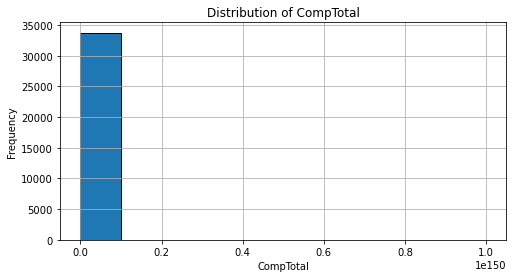

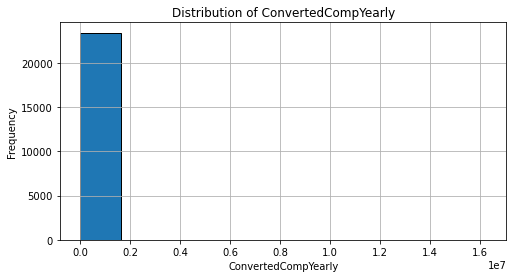

In [27]:
# plot distributions for compensation-related columns
for col in comp_columns:
    plt.figure(figsize=(8,4))
    df[col].dropna().hist(bins=10, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

There are clearly some outliers disrupting the visualization of the plot, so calculate the 99th percentile to know what to plot below

In [29]:
# check 99th percentile of `CompTotal`
comp_total_q99 = df['CompTotal'].quantile(0.99)
print(f"99th percentile of CompTotal: {comp_total_q99}")

# check 99th percentile of `ConvertedCompYearly`
conv_comp_q99 = df['ConvertedCompYearly'].quantile(0.99)
print(f"99th percentile of ConvertedCompYearly: {conv_comp_q99}")

99th percentile of CompTotal: 117728100.00000012
99th percentile of ConvertedCompYearly: 393751.0599999984


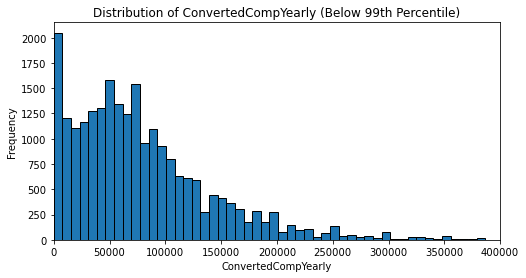

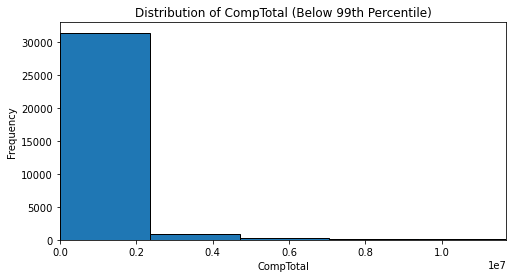

In [39]:
# plot `ConvertedCompYearly` distribution
# filter to below 99th percentile
filtered_converted = df[df['ConvertedCompYearly'] < 393751]

plt.figure(figsize=(8,4))
plt.hist(filtered_converted['ConvertedCompYearly'], bins=50, edgecolor='black')
plt.title('Distribution of ConvertedCompYearly (Below 99th Percentile)')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
plt.xlim(0, 400000)
plt.show()

# plot `CompTotal` distribution
# filter to below 99th percentile
filtered_comptotal = df[df['CompTotal'] < 117728100]

plt.figure(figsize=(8,4))
plt.hist(filtered_comptotal['CompTotal'], bins=50, edgecolor='black')
plt.title('Distribution of CompTotal (Below 99th Percentile)')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.xlim(0, 117_000_00)
plt.show()

<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
